# Antes de começar é necessário fazer uma pequena introdução
## Todo este trabalho foi realizado com objetivo de responder a seguinte pergunta:

* Eu consigo prever o preço da casa com base nos dados apresentados?

### Para responder esta pergunta é necessário fazer uma análise dos dados, algumas regressões e depois comparar as métricas específicas de cada regressão. Além disso será feito uma análise de cada variável individualmente em comparação com o preço, para verificar se as métricas condizem com a realidade

In [97]:
### Talvez fazer uma função de construção de gráficos

## Explicação das Variáveis

### Antes de fazer o estudo das variáveis é necessário fazer estes apontamentos:

* A planilha que foi utilizada aqui foi retirada do site : https://www.kaggle.com/harlfoxem/housesalesprediction, porém nele não foram encontradas as explicações necessárias.

* Depois eu consegui encontrar na aba Discussion( ) uma pessoa que teve o mesmo problema que eu e na solução deste problema o um jovem explicou que o DataSet foi retirado do site: https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/ (está no .png a baixo)

* Apesar de alguns nomes serem diferente eles tratam das mesmas variáves, correção de nomes:

 * sqft_ving está na planilha como sqft_living
 * sqft_ment está na planilha como sqft_basement
 * yr_re_ated está na planilha como yr_renovated
 * lat e long já vieram separados em duas cédulas diferentes
 * squft_ng15 está na planilha como sqft_living

<img src="explicacao_dados.png">

### Para facilitar o entendimento a explicação será traudizida:
* date : a data em que ela foi vendida
* price : preço de venda
* bathrooms : número de banheiros na casa
* bedrooms : número de quartos na casa
* sqft_living : tamanho da área útil em metros quadrados
* sqft_lot : tamanho do lote do terreno em metros quadrados
* floors : número de pisos na casa
* waterfront : se igual a 1 significa que a casa é beira-mar, se igual a 0 significa o contrário
* view : um indice de 0 a 4 (nota máxima) para quão boa a vista é.
* condition: condição da casa, ranqueada de 1 a 5 (nota máxima)
* grade : Classificação da qualidade da construção com base mos tipos de materiais e na qualidade do trabalho. Construções com maior "grade" custam mais para ser construída
* sqft_above : quantos metros quadrados em pisos superiores
* sqft_basement: quantos metros quadrados em pisos inferiores
* yr_built: ano em que a casa foi construida
* yr_renovated: ano em que a casa foi reformada, "0" se não foi
* zipcode : 5 digitos do endereço da casa
* lat : latitude em que a casa se encontra
* long : longitude em que a casa se encontra
* sqft_living : tamanho médio das 15 casas mais próximas, em metros quadrados
* tamanho médio do lote das 15 casas mais próximas, em metros quadrados

## Agora começara a exploração dos dados

### Importando as "libraries"

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
import math

from scipy import stats

import statsmodels.api as sm
#from statsmodels.stats import diagnostic as diag
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Loading Data

#### Obtém-se os dados da planilha de nome "kc_house_data.xlsx"

In [3]:
datasheet = pd.read_excel('kc_house_data.xlsx')

In [4]:
##Limpa-se os dados inexistentes "NaN"
datasheet.fillna(0)

#seting colum, coloca-se ela como primeiro de todas
datasheet.index = datasheet['yr_built']
datasheet.drop('yr_built', axis = 1).head(2)

#removing the id, o ID só atrapalhará na resolução do problema
#datasheet.drop('id', axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,,,,
1955,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650
1951,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639


### Correções necessárias:

* Em primeiro lugar foi necessário fragmentar a coluna date em 3 colunas: dia, mes e ano. Pois o jeito que estava escrito só dificultava o processamento dos dados, facilitando assim análises futuras

In [5]:
#chaning the date
list_date = list(datasheet.date)
year = []
day = []
month = []

contador = 0
while contador < len(list_date):
    list_date[contador] = list_date[contador].replace('T','')
    list_date[contador] = list_date[contador][0:8]
    
    year.append(list_date[contador][0:4])
    day.append(list_date[contador][6:8])
    month.append(list_date[contador][4:6])
    
    contador = contador + 1
    
# remover de 8 a 13
datasheet.date = list_date
datasheet['day'] = day
datasheet['month'] = month
datasheet['year'] = year

### Correções necessárias:

* Em segundo lugar foi necessário retirar as colunas: id, date, zipcode, day, month e year. Pois elas não tinham nenhuma utilizade para análise dos dados.

In [6]:
#droping the date, id, day, month, year
cleaned_datasheet = datasheet.drop(['date','id','zipcode','day','month','year'], axis = 1)

In [7]:
cleaned_datasheet.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,,
1955,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1951,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639


### Aqui todo infinito será trocado por NaN e depois disso todos os NaN serão retirados da Tabela

In [8]:
pd.set_option('use_inf_as_na', True)
cleaned_datasheet = cleaned_datasheet.dropna()

## Análise do Preço de maneira Isolada

In [9]:
#Import necessário:
from scipy.stats import norm

### Fazendo um histograma e depois plotando uma linha de tendência normal

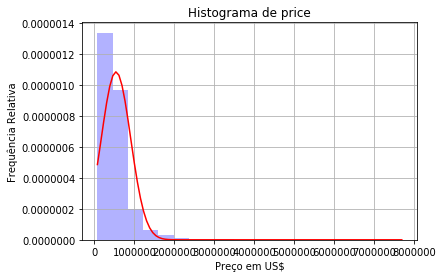

In [88]:
minimum = min(cleaned_datasheet['price'])
maximum = max(cleaned_datasheet['price'])
x = np.linspace(minimum, maximum, 100)
mean = np.mean(cleaned_datasheet['price'])
std = np.std(cleaned_datasheet['price'])

#Histograma
plt.hist(cleaned_datasheet['price'], bins = 20, density = True, alpha = 0.3, color ='b')
y = norm.pdf(x, mean, std)

#Para a curva normal
plt.title("Histograma de price")
plt.xlabel("Preço em US$")
plt.ylabel("Frequência Relativa")
plt.plot(x,y, color = 'red')
plt.grid(True)
plt.show()

### Após analisar o histograma:
* Podemos concluir que a variável "price" tem uma distribuição assimétrica a direita, pois a sua assimetria está à direita formando uma "cauda"
* O preço das casas geralmente não passam de 200.000 (chute que será analisado) dólares e, por isso, há uma assimetria muito grande para a direita
* Basicamente casas a cima de 200.000 (chute que será analisado) dólares podem ter a suspeição de serem outliers

### Análise de outliers:

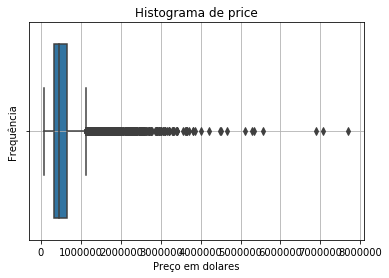

In [96]:
sns.boxplot(cleaned_datasheet.price)
plt.title("Histograma de price")
plt.xlabel("Preço em dolares")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

* Após analisar o boxplot podemos concluir que os preços a cima de 120.000 (aproximadamente) dólares podem ser considerados outliers, pois eles saturam o Intervalo Interquartilico à direita. O chute de 120.000 é mais preciso do que o valor 200.000 antes estipuladO

## Matriz de Correlação:

#### Antes de analisar as correlações é necessário saber que uma correlação determina a tendência entre duas variáveis e o grau de integração entre elas. Se for negativa quer dizer que são grandezas inversamente proporcionais e se for positiva são grandezas diretamente proporcionais. Existem 3 correlações que são notáveis em uma análise de dados, a primeira é +1 que indica uma correlação positiva máxima, a segunda é -1 que indica uma correlação negativa máxima e a terceira é 0 que indica que não há correlação entre as variáveis analisadas

###### É necessário lembrar que correlação não necessariamente pode implicar causa ou consequência

In [11]:
matriz_correl = cleaned_datasheet.corr()
matriz_correl

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


## Matriz de calor

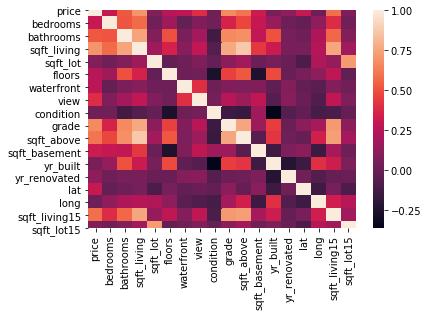

In [12]:
sns.heatmap(matriz_correl)

#### A matriz de calor é só uma forma mais fácil de mostrar como os dados estão organizados. Note que a correlação entre duas variáveis iguais é sempre igual a 1 (ex: price com price). Quando a correlação é maior que 0.6 costuma-se dizer que a correlação é alta, entre 0.4 e 0.6 costuma-se dizer que a correlação é média e de 0.4 a 0 costuma-se dizer que a correlação é baixa (note que o mesmo é válido para seus respectivos valores negativos).
* Quanto mais próxima de 1 a cor ficará mais quente, quanto mais longe de 1 a cor ficará mais fria

###### Ex de correlação alta: price X sqft_living15
###### Ex de correlação média: price X lat 
###### Ex de correlação baixa: price X bedrooms

## Análise Inidividual

### agora será feita uma Análise Individual de cada variável comparando ao seu respectivo grau de interação com o "price":

0.5251375054139615

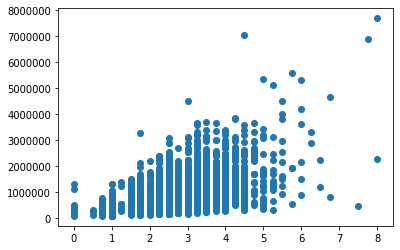

In [13]:
plt.scatter(cleaned_datasheet.bathrooms,cleaned_datasheet.price)
cleaned_datasheet.bathrooms.corr(cleaned_datasheet.price)

### Pode-se perceber que a correlação entre a variável banheiro e a variável preço é média (0.52)

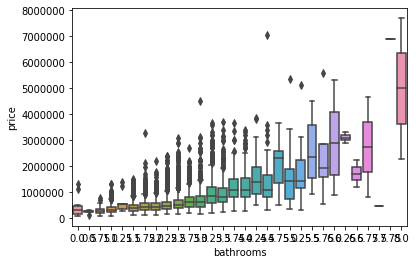

In [14]:
sns.boxplot(x = "bathrooms", y = "price", data = cleaned_datasheet)

### Com o boxplot fica mais fáci a visualização dos dados, pois ele consegue mostrar os Intervalos Interquartílicos, a mediana (segundo quartil) e também demonstra onde estão os outliers

0.3083495981456382

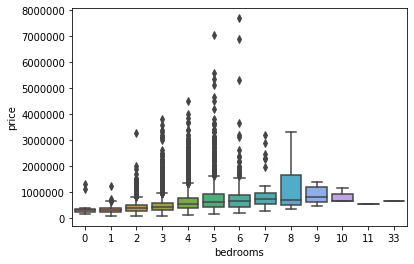

In [15]:
sns.boxplot(x = "bedrooms", y = "price", data = cleaned_datasheet)
cleaned_datasheet.bedrooms.corr(cleaned_datasheet.price)

0.7020350546118004

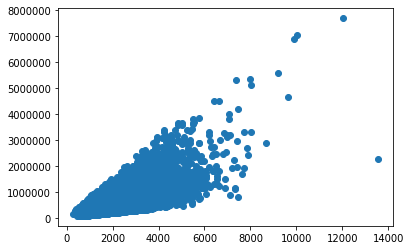

In [16]:
plt.scatter(cleaned_datasheet.sqft_living, cleaned_datasheet.price)
cleaned_datasheet.sqft_living.corr(cleaned_datasheet.price)

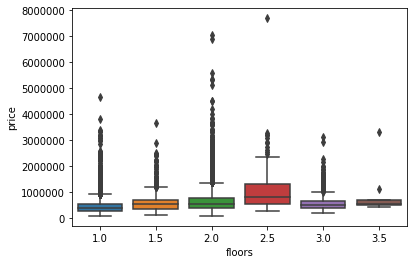

In [17]:
sns.boxplot(x = "floors", y = "price", data = cleaned_datasheet)

0.25679388755071847

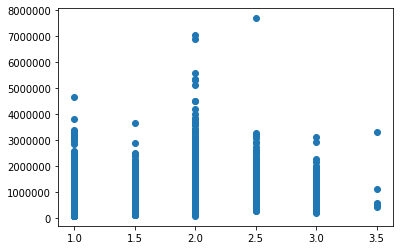

In [18]:
plt.scatter(cleaned_datasheet.floors,cleaned_datasheet.price)
cleaned_datasheet.floors.corr(cleaned_datasheet.price)

0.6055672983560781

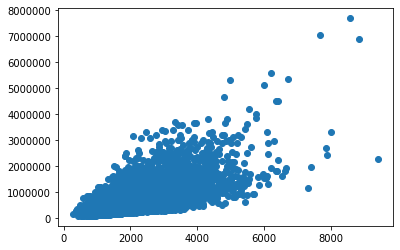

In [19]:
plt.scatter(cleaned_datasheet.sqft_above, cleaned_datasheet.price)
cleaned_datasheet.sqft_above.corr(cleaned_datasheet.price)

0.3238160207119834

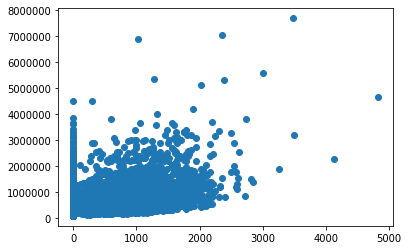

In [20]:
plt.scatter(cleaned_datasheet.sqft_basement, cleaned_datasheet.price)
cleaned_datasheet.sqft_basement.corr(cleaned_datasheet.price)

0.05401153149479271

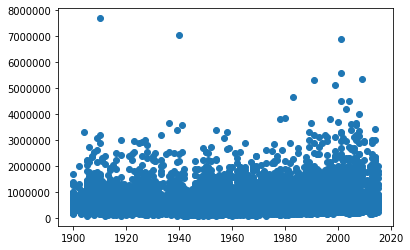

In [21]:
plt.scatter(cleaned_datasheet.yr_built, cleaned_datasheet.price)
cleaned_datasheet.yr_built.corr(cleaned_datasheet.price)

In [22]:
#plt.scatter(cleaned_datasheet.grade, cleaned_datasheet.price)
cleaned_datasheet.grade.corr(cleaned_datasheet.price)

0.6674342560202366

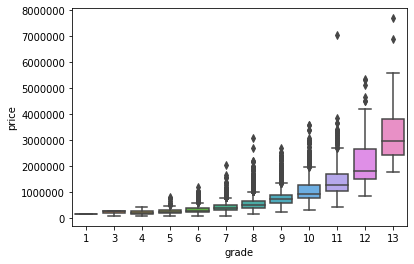

In [23]:
sns.boxplot(x = "grade", y = "price", data = cleaned_datasheet)

0.30700347999521854

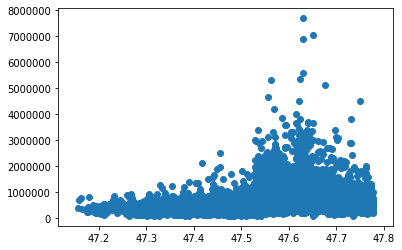

In [24]:
plt.scatter(cleaned_datasheet.lat,cleaned_datasheet.price)
cleaned_datasheet.lat.corr(cleaned_datasheet.price)

0.021626241039306694

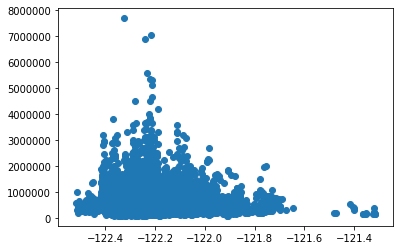

In [98]:
plt.scatter(cleaned_datasheet.long,cleaned_datasheet.price)
cleaned_datasheet.long.corr(cleaned_datasheet.price)

0.7020350546118004

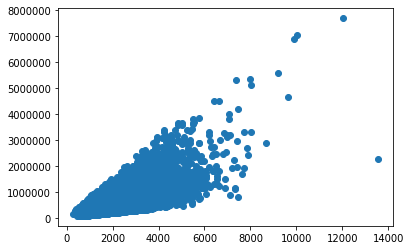

In [26]:
plt.scatter(cleaned_datasheet.sqft_living, cleaned_datasheet.price)
cleaned_datasheet.sqft_living.corr(cleaned_datasheet.price)

0.08244715251948591

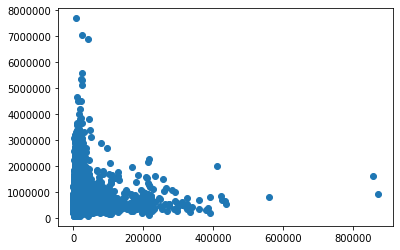

In [27]:
plt.scatter(cleaned_datasheet.sqft_lot15, cleaned_datasheet.price)
cleaned_datasheet.sqft_lot15.corr(cleaned_datasheet.price)
#matar esse

## Análise descritiva de cada variável

### Aqui está uma descrição por cima de todos os dados presentes na tabela, onde:

* count representa a quantidade de valores
* mean represnta a média
* std representa o desvio padrão
* min representa o mínimo de cada variável
* 25% representa o primeiro quartil
* 50% representa a mediana que equivale ao segundo quartil
* 75% representa o terceiro quartil
* max represnta o máximo de cada variável

In [28]:
cleaned_datasheet.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#Acho que não uso para nada então vou deletar esta cédula

#yr_built = cleaned_datasheet.yr_built
#bedrooms = cleaned_datasheet.bedrooms
#bathrooms = cleaned_datasheet.bathrooms
#sq_living = cleaned_datasheet.sqft_living
#floors = cleaned_datasheet.floors
#condition = cleaned_datasheet.condition
#yr_renovation = cleaned_datasheet.yr_renovated

## Aqui começa uma parametrização para se fazer uma Regressão Linear

* no X coloca-se as váriveis que serão utilizadas para se chegar em uma resposta
* no Y coloca-se a variável de respostas

##### Note-se que já foi retirado algumas variáveis e as justificativas foram dadas nas abas: "Correções Necessárias"

In [103]:
x = cleaned_datasheet.loc[:,["bathrooms","bedrooms","sqft_living","floors","waterfront","view","condition","grade", "sqft_above", "sqft_basement", "yr_built", "lat", "long"]]
y = cleaned_datasheet.price

### Verificando o tipo de cada variável

In [109]:
x.dtypes.head

<bound method NDFrame.head of bathrooms        float64
bedrooms           int64
sqft_living        int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
lat              float64
long             float64
dtype: object>

### Verificando se ainda há algum NaN dentro da planilha

In [106]:
x.isna().sum()

bathrooms        0
bedrooms         0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
dtype: int64

## Regressão Linear Múltipla realizada:

* Utilizando o método de adição de constante da biblioteca seaborn e depois ajeitando a distribuição das variáveis com base em um modelo

#### O coef indica qual o grau de importância que uma variável tem para se encontrar a resposta desejada ("price" no caso)

In [41]:
#Fazer essa regressão
xc = sm.add_constant(x)
model = sm.OLS(y, xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     4077.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:30:02   Log-Likelihood:            -2.9482e+05
No. Observations:               21613   AIC:                         5.897e+05
Df Residuals:                   21600   BIC:                         5.898e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.504e+07   1.53e+06    -22.913      0.000    -3.8e+07    -3.2e+07
bathrooms      4.434e+04   3252.732     13.633      0.000     3.8e+04    5.07e+04
bedrooms      -3.388e+04   1899.098    -17.838      0.000   -3.76e+04   -3.02e+04
sqft_living     113.5806      2.139     53.102      0.000     109.388     117.773
floors         -514.9361   3573.861     -0.144      0.885   -7519.967    6490.095
waterfront      5.89e+05   1.75e+04     33.673      0.000    5.55e+05    6.23e+05
view           5.193e+04   2124.870     24.439      0.000    4.78e+04    5.61e+04
condition       2.82e+04   2324.381     12.134      0.000    2.36e+04    3.28e+04
grade          1.026e+05   2078.156     49.394      0.000    9.86e+04    1.07e+05
sqft_above       75.1244      2.146     35.000      0.000      70.917      79.332
sqft_basement    38.4563      2.670     14.404      0.000      33.223      43.689
yr_built      -2589.3148     68.897    -37.582      0.000   -2724.358   -2454.271
lat            5.632e+05   1.05e+04     53.489      0.000    5.43e+05    5.84e+05
long          -1.034e+05   1.15e+04     -8.996      0.000   -1.26e+05   -8.09e+04
==============================================================================
Omnibus:                    18258.724   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1750674.533
Skew:                           3.545   Prob(JB):                         0.00
Kurtosis:                      46.517   Cond. No.                     1.60e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Segunda Regressão Linear

* Feita utilizando o método train_test_Split do sklearn_model_selection

In [43]:
from sklearn.model_selection import train_test_split

### Separa-se todas as variáveis previamente em uma lista, para facilitar assim o entendimento

In [44]:
lista_data = ["bathrooms","bedrooms","sqft_living","floors","waterfront","view","condition","grade", "sqft_above", "sqft_basement", "lat", "long"]

### Explicações do método utilizado abaixo:

* X_train provém do DataFrame cleaned_datasheet[lista_data] 
* Y_train provém da Series cleaned_datasheet.price()
* train_size demonstra qual será o tamanho da planilha de treinamento

In [45]:
#X_train, X_test, Y_train, Y_test = train_test_split(cleaned_datasheet.loc[:,lista_data], cleaned_datasheet.price, train_size =.7)
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_datasheet[lista_data], cleaned_datasheet.price, train_size =.7)

### Analisando o tamanho de dados para ver se a coleta para os testes foi efetivamente realizada

In [46]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(15129, 12) (6484, 12) (15129,) (6484,)


### LinearRegression() é uma Regressão Linear padrão

In [47]:
linreg = LinearRegression()

In [50]:
X_train.head(2)

,bathrooms,bedrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long
yr_built,,,,,,,,,,,,
1950,1.0,2,1370,1.0,0,0,3,6,1370,0,47.6238,-122.191
1993,2.5,4,2160,2.0,0,0,3,7,2160,0,47.2668,-122.231


### Agora é necessário utilizar o método fit para que tanto X_train quanto Y_train façam parte de uma Regressão Linear

In [52]:
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Agora faz-se uma predição da resposta com base no X_teste

In [53]:
y_pred = linreg.predict(X_test)
y_pred 

array([653002.62187047, 963531.35785981, 832478.10206509, ...,
       282682.74425402, 567389.67176447,  60206.24614044])

In [57]:
#Y_test / 1000

In [56]:
#pd.Series(y_pred / 1000)

### Erro quadrático médio feito "a mão", depois será feito com maior precisão

In [59]:
np.mean((Y_test - y_pred)**2) #mean squared error

49133439252.303925

## Importando algumas métricas que serão realizadas

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, average_precision_score

### Erro quadrático médio feito de forma mais precisa

In [62]:
mean_squared_error(Y_test, y_pred)

49133439252.3042

### R² simboliza a correlação entre Y_test e y_pred

In [110]:
r2_score(Y_test, y_pred)
#normalizado

0.6527275461816486

### Erro absoluto médio

In [65]:
mean_absolute_error(Y_test, y_pred)
#faz sentido
#fazer: comparar com outros modelos

133960.44987951344

In [ ]:
#average_precision_score(Y_test, y_pred)

## Agora será feito uma Regressão pelo método: RandomForestRegressor

### Importando o método:

In [66]:
from sklearn.ensemble import RandomForestRegressor

### Criando um modelo padrão de RandomForestRegressor

In [67]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
regressor.fit(X_train, Y_train)

In [ ]:
y_pred_rf = regressor.predict(X_test)

In [ ]:
y_pred_rf

In [ ]:
mean_squared_error(Y_test, y_pred_rf)

In [ ]:
#x_train
#Y_train
xc = sm.add_constant(X_train)
model = sm.OLS(Y_train, xc)
results = model.fit()
results.summary()

In [ ]:
xc_2 = sm.add_constant(X_test)
y_pred_2 = results.predict(xc_2)

In [ ]:
mean_squared_error(Y_test, y_pred_2)